Simple sentiment analysis with SpaCy. Use IMDB Large Movie Reviews Dataset from Kaggle.

In [25]:
# import to load and visualize
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [26]:
# import dataset
data = pd.read_csv('imdb_sup.csv')

# but we onlye use first 5000 rows
mcommentDF = data.sample(n=5000, random_state=1)
mcommentDF

,Review,Rating,Sentiment
26247,"Claire Booth Luce's ""The Women"" shows relation...",7,1
35067,_The Wild Life_ has an obvious resemblance to ...,7,1
34590,This was the film that first indicated to me w...,8,1
16668,The plot has already been described by other r...,4,0
12196,Most of the comments have been positive but I ...,10,1
...,...,...,...
49563,This film has the worst editing I've ever seen...,1,0
16500,"In a word, this film was boring. It lacked lif...",1,0
49787,"ExCUSE me, but my tongue was TOO in my cheek w...",3,0
19719,It is very unfortunate when a movie such as th...,1,0


In [27]:
# check the shape
mcommentDF.shape

(5000, 3)

In [28]:
# see head
mcommentDF.head()

,Review,Rating,Sentiment
26247,"Claire Booth Luce's ""The Women"" shows relation...",7,1
35067,_The Wild Life_ has an obvious resemblance to ...,7,1
34590,This was the film that first indicated to me w...,8,1
16668,The plot has already been described by other r...,4,0
12196,Most of the comments have been positive but I ...,10,1


In [29]:
# drop missing values
mcommentDF_clean = mcommentDF[['Review','Rating', 'Sentiment']].dropna()

In [30]:
mcommentDF_clean

,Review,Rating,Sentiment
26247,"Claire Booth Luce's ""The Women"" shows relation...",7,1
35067,_The Wild Life_ has an obvious resemblance to ...,7,1
34590,This was the film that first indicated to me w...,8,1
16668,The plot has already been described by other r...,4,0
12196,Most of the comments have been positive but I ...,10,1
...,...,...,...
49563,This film has the worst editing I've ever seen...,1,0
16500,"In a word, this film was boring. It lacked lif...",1,0
49787,"ExCUSE me, but my tongue was TOO in my cheek w...",3,0
19719,It is very unfortunate when a movie such as th...,1,0


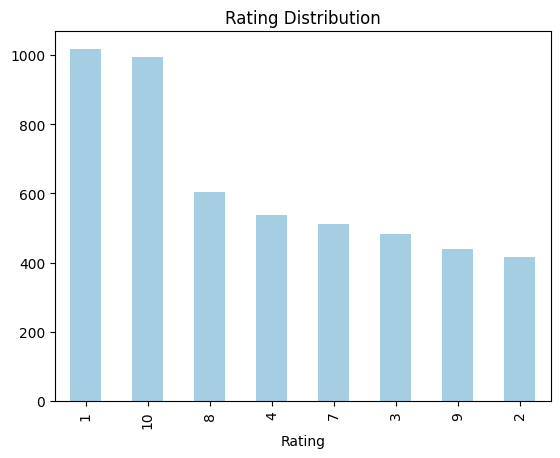

In [31]:
# see the scores distributed
axplot = mcommentDF_clean.Rating.value_counts().plot(kind='bar', colormap='Paired')
plt.title('Rating Distribution')
plt.show()

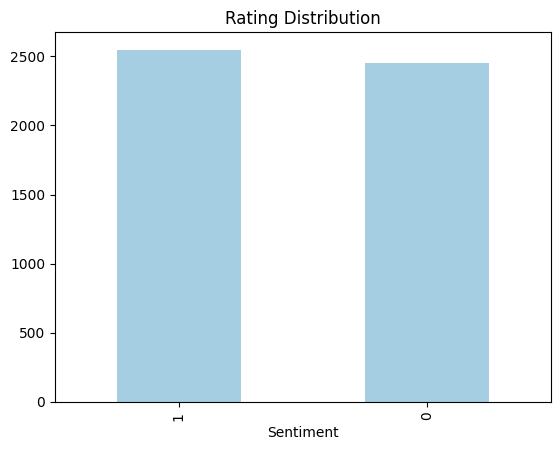

In [32]:
# see the sentiment distributed
axplot = mcommentDF_clean.Sentiment.value_counts().plot(kind='bar', colormap='Paired')
plt.title('Rating Distribution')
plt.show()

In [33]:
# review data
mcommentDF.head()

,Review,Rating,Sentiment
26247,"Claire Booth Luce's ""The Women"" shows relation...",7,1
35067,_The Wild Life_ has an obvious resemblance to ...,7,1
34590,This was the film that first indicated to me w...,8,1
16668,The plot has already been described by other r...,4,0
12196,Most of the comments have been positive but I ...,10,1


In [34]:
# Training the classifier

# import 
import spacy
import random

from spacy.training import Example
from spacy.pipeline.textcat_multilabel import DEFAULT_MULTI_TEXTCAT_MODEL

In [35]:
# load spacy model
nlp = spacy.load('en_core_web_md')

In [36]:
#  set config model
config = {
    'threshold' : 0.5,
    'model' : DEFAULT_MULTI_TEXTCAT_MODEL
}

In [37]:
# create model object
categorizer = nlp.add_pipe('textcat_multilabel', config=config)

In [38]:
# create IMDB sample object
movie_comment_exp = []

# load all tjhe IMDB data to sample object
for idx, rw in mcommentDF.iterrows():
    comment = rw['Review']
    rating = rw['Sentiment']
    category = {'POS' : True, 'NEG' : False} if rating == 1 else {'POS': False, 'NEG': True}
    movie_comment_exp.append(Example.from_dict(nlp.make_doc(comment), {'cats' : category}))

In [39]:
# review
movie_comment_exp[2]

{'doc_annotation': {'cats': {'POS': True, 'NEG': False}, 'entities': ['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O'], 'spans': {}, 'links': {}}, 'token_annotation': {'ORTH': ['This', 'was', 'the', 'film', 'that', 'first', 'indicated', 'to', 'me', 'what', 'a', 'great', 'actor', 'Martin', 'Sheen', 'really', 

In [40]:
# add two label 'POS' and 'NEG' to th model
categorizer.add_label('POS')
categorizer.add_label('NEG')

# initialize
categorizer.initialize(lambda:movie_comment_exp, nlp=nlp)

In [41]:
categorizer

In [42]:
# training

# set epochs
epochs = 2 

# training loop
with nlp.select_pipes(enable='textcat_multilabel'):
    optimizer = nlp.resume_training()
    for i in range(epochs):
        random.shuffle(movie_comment_exp)
        for exp in movie_comment_exp:
            nlp.update([exp], sgd=optimizer)
    

In [43]:
# test model
test = nlp('This is the best movie that i have ever watched')
test.cats

{'POS': 0.9214524030685425, 'NEG': 0.13532193005084991}

In [44]:
test2 = nlp('This movie is so bad')
test2.cats

{'POS': 0.04044546186923981, 'NEG': 0.9324907064437866}

In [48]:
test3 = nlp('kind of film that im gonna throw up')
test3.cats

{'POS': 0.4921421408653259, 'NEG': 0.24965733289718628}

In [49]:
# with input
input_text = input('Enter your review: ')
tst = nlp(input_text)
print(tst.cats)

{'POS': 0.9066663980484009, 'NEG': 0.18571558594703674}
